<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('darkgrid')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
from pprint import pprint
sat_data = []

with open('sat_scores.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('sat_scores_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)

    for rows in reader:
        sat_data.append(rows)

sat_keys = sat_data[0]      
sat_values = sat_data[1:]

sat_dict = {sat_keys[0]:[rows[0] for rows in sat_values],
           sat_keys[1]:[int(rows[1]) for rows in sat_values],
           sat_keys[2]:[int(rows[2]) for rows in sat_values],
           sat_keys[3]:[int(rows[3]) for rows in sat_values],}

pprint(sat_dict)

{'Math': [510,
          513,
          515,
          505,
          516,
          499,
          499,
          506,
          500,
          501,
          499,
          510,
          499,
          489,
          501,
          488,
          474,
          526,
          499,
          527,
          499,
          515,
          510,
          517,
          525,
          515,
          542,
          439,
          539,
          512,
          542,
          553,
          542,
          589,
          550,
          545,
          572,
          589,
          580,
          554,
          568,
          561,
          577,
          562,
          596,
          550,
          570,
          603,
          582,
          599,
          551,
          514],
 'Rate': [82,
          81,
          79,
          77,
          72,
          71,
          71,
          69,
          69,
          68,
          67,
          65,
          65,
          63,
          60,
         

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#pandas .read_csv() function
sat_score = pd.read_csv('sat_scores.csv', encoding = 'utf-8')

print(sat_score.dtypes)

print('---------------')

#with SAT dictionary
print(pd.DataFrame.from_dict(sat_dict).dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
---------------
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


# There is no difference between the two methods

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
sat_score.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Our data describes the mean scores for Verbal and Math for each of the respective US states.

The Rate's column also tells us the participation rate for the sat exam in each state.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
data_dict = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
data_dict['Column Name']= sat_score.columns
data_dict['Data Type']= [dtype for dtype in sat_score.dtypes]
data_dict['Description'] = ['State of the United States','Rate of Participation in SAT',
                            'Mean Verbal(Reading) Score','Mean Mathematics Score']/

shape = sat_score.shape

print(f'The shape of the entire dataset is {shape[0]} rows and {shape[1]} columns. {shape}')
print('')
data_dict

SyntaxError: invalid syntax (<ipython-input-5-f91be8897b10>, line 5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [ ]:
sns.distplot(sat_score['Rate'], kde=False, bins=8, color='purple')
plt.show()

In [ ]:
sns.distplot(sat_score['Math'],kde=False, bins=10, color='orange')
plt.show()

In [ ]:
sns.distplot(sat_score['Verbal'],kde=False, bins=10)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [ ]:
    sns.pairplot(sat_score)
    plt.show()

Rate has negative correlation with both Verbal and Math

Verbal has strong positive correlation with Math (only 1 extreme outlier), vice versa.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [ ]:
sat_score_verbal_math = sat_score[['Verbal','Math']]
sat_score_verbal_math.plot.hist(stacked=True, bins=15, alpha=0.6)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [ ]:
sat_score_verbal_math.plot.box()
plt.show()

Boxplot is able to tell us that Math Score is much more volatile than Verbal score.

This is not clearly visible from scatterplot or even histogram.

Math have a larger range of between approximately 425 to 600 while Verbal has a range of 480 to 595 approximately.

Math and Verbal have similar ranges of between 400 to 600. However, Rate falls way below this range at between 10 to 80

In [ ]:
sat_score.mean()

Plotting Rate on the same chart as Math and Verbal makes visual comparison difficult as they are of different value ranges as seen by the Mean values above.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [ ]:
#sat_score.plot.box()

#We'll rescale the variables using a procedure called “standardization”
#which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

#sat_score_std = (sat_score - sat_score.mean()) / sat_score.std()

#first, create a subset that only contains the integers columns

sat_score_int = sat_score[['Rate','Verbal','Math']]

#standardization procedure

sat_score_stand = (sat_score_int - sat_score_int.mean()) / sat_score_int.std()

sat_score_stand.plot.box()
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [ ]:
verbal_mean = sat_score.loc[:,'Verbal'].mean()

above_verbal_mean = sat_score[sat_score['Verbal']>verbal_mean]['State'].tolist()

length_above_verbal_mean = len(above_verbal_mean)

print(f'{length_above_verbal_mean} states are above the Verbal scores mean')

above_verbal_mean

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [ ]:
verbal_median = sat_score.loc[:,'Verbal'].median()

above_verbal_median = sat_score[sat_score['Verbal']>verbal_median]['State'].tolist()
 
length_above_verbal_median = len(above_verbal_median)

print(f'{length_above_verbal_median} states are above the Verbal scores median')

above_verbal_median

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [ ]:
sat_score['Verbal - Math'] = sat_score['Verbal'] - sat_score['Math']

sat_score

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [ ]:
verbal_greater = sat_score.sort_values(by=['Verbal - Math'],ascending=False).reset_index()
math_greater = sat_score.sort_values(by=['Verbal - Math'],ascending=True).reset_index()

verbal_greater.head(3)

In [ ]:
math_greater.head(3)

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [ ]:
sat_score.corr()

# Rate has strong negatively inverse relationship with Verbal and Math Score
# Verbal and Math score ahs strong positive relationship



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
sat_score.describe()

Count = number of observations.

Mean = Mean(average) of values.

Std = Standard Deviation of the observations

25% = 25th percentile

50% = median

75% = 75th percentile

Max = Maximum of the values in the object.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [ ]:
sat_score.cov()

1. Using covariance, you could determine whether units were increasing or decreasing, 
But it is impossible to measure the degree to which the variables moved together as covariance does not use one standard unit of measurement. 

2. Divide covariance by multiplication of standard deviation of both columns 

3. To measure the degree to which variables move together, you must use correlation.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [36]:
drug_use = pd.read_csv('drug-use-by-age.csv', encoding = 'utf-8')

drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [37]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

# Data Cleaning is required. 






Some cells(8 Cells, to be exact) that are supposed to be 0 are extracted as '-' instead. 

So we need to replace these '-' cells to NaN.

Because of the above issue, certain columns' data types are object instead of float.

As such, we will need to change these columns' data type to "float" first before proceding with EDA.

It should not affect our approach to EDA on this dataset as long as the other cells are accurately collected and recorded.

In [38]:
# replace all '-' with NaN
drug_use.replace('-', np.nan, inplace=True)

# convert object column types to float
for i in drug_use.columns:
    if i != 'n':
        try:
            drug_use[i] = drug_use[i].astype(float)
        except:
            pass
        
# could not view correlation with age due to age categorization after 22years old asobject item cannot be measured
# so i will convert age to integer in the next two steps in order to calculate age's correlation to each respective drug

# slice the first two string to retain the 'starting age' for the row
drug_use['age']=drug_use.age.str.slice(stop=2)

#convert age column from object to int type
drug_use['age'] = drug_use['age'].astype(int)

drug_use

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


##### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [39]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null int64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyconti

In [11]:
drug_use.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,24.529412,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,14.058439,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,26.000000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [12]:
drug_use.shape

(17, 28)

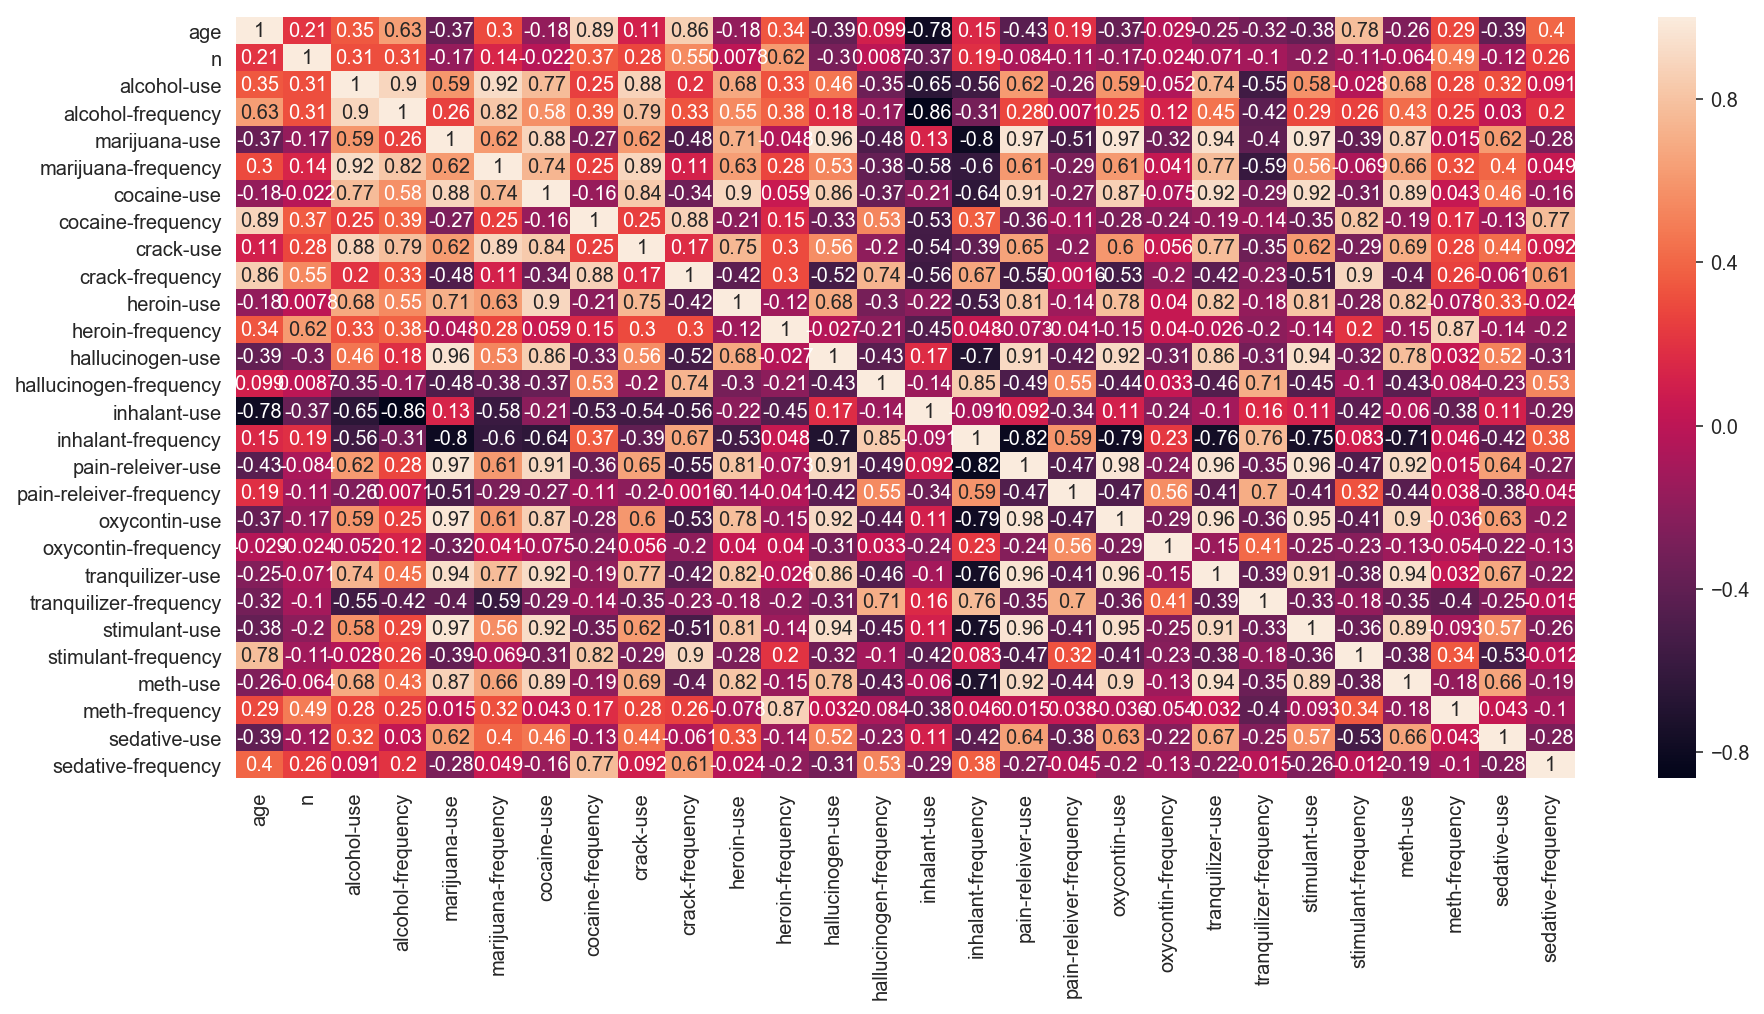

In [13]:
drug_use.corr()
plt.figure(figsize=(15,7))
sns.heatmap(drug_use.corr(), annot=True)
plt.show()

 The above correlation matrix is too messy as it contains too many columns

 



I'll split the dataframe by usage and frequency to get a better understanding of the dataset


lets start with a new drug_frequency subset, create a freq_list to extract all frequency columns in order to create  new drug_freq dataframe

In [43]:
freq_list = []
for name in drug_use.columns:
    if 'age' in name:
        freq_list.append(name)    
    elif 'frequency' in name:
        freq_list.append(name)
        
drug_freq = drug_use[freq_list]

drug_freq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,13,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


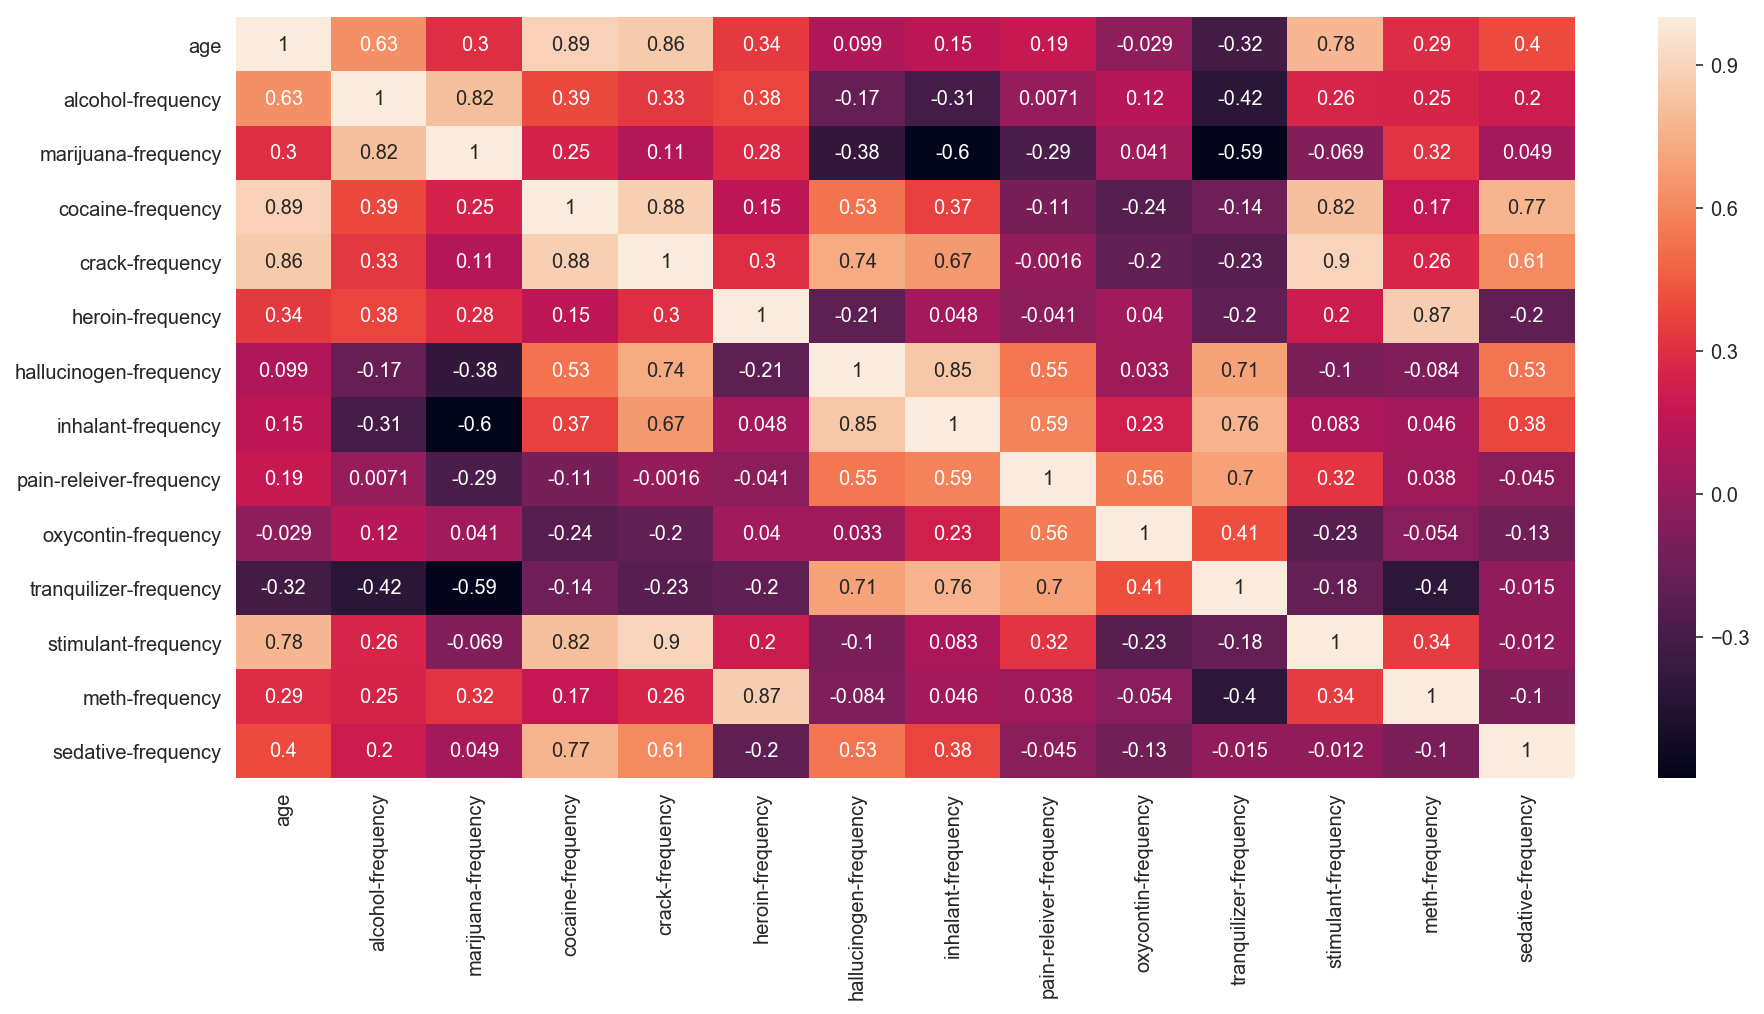

In [18]:
drug_freq.corr()
plt.figure(figsize=(15,7))
sns.heatmap(drug_freq.corr(), annot=True)
plt.show()

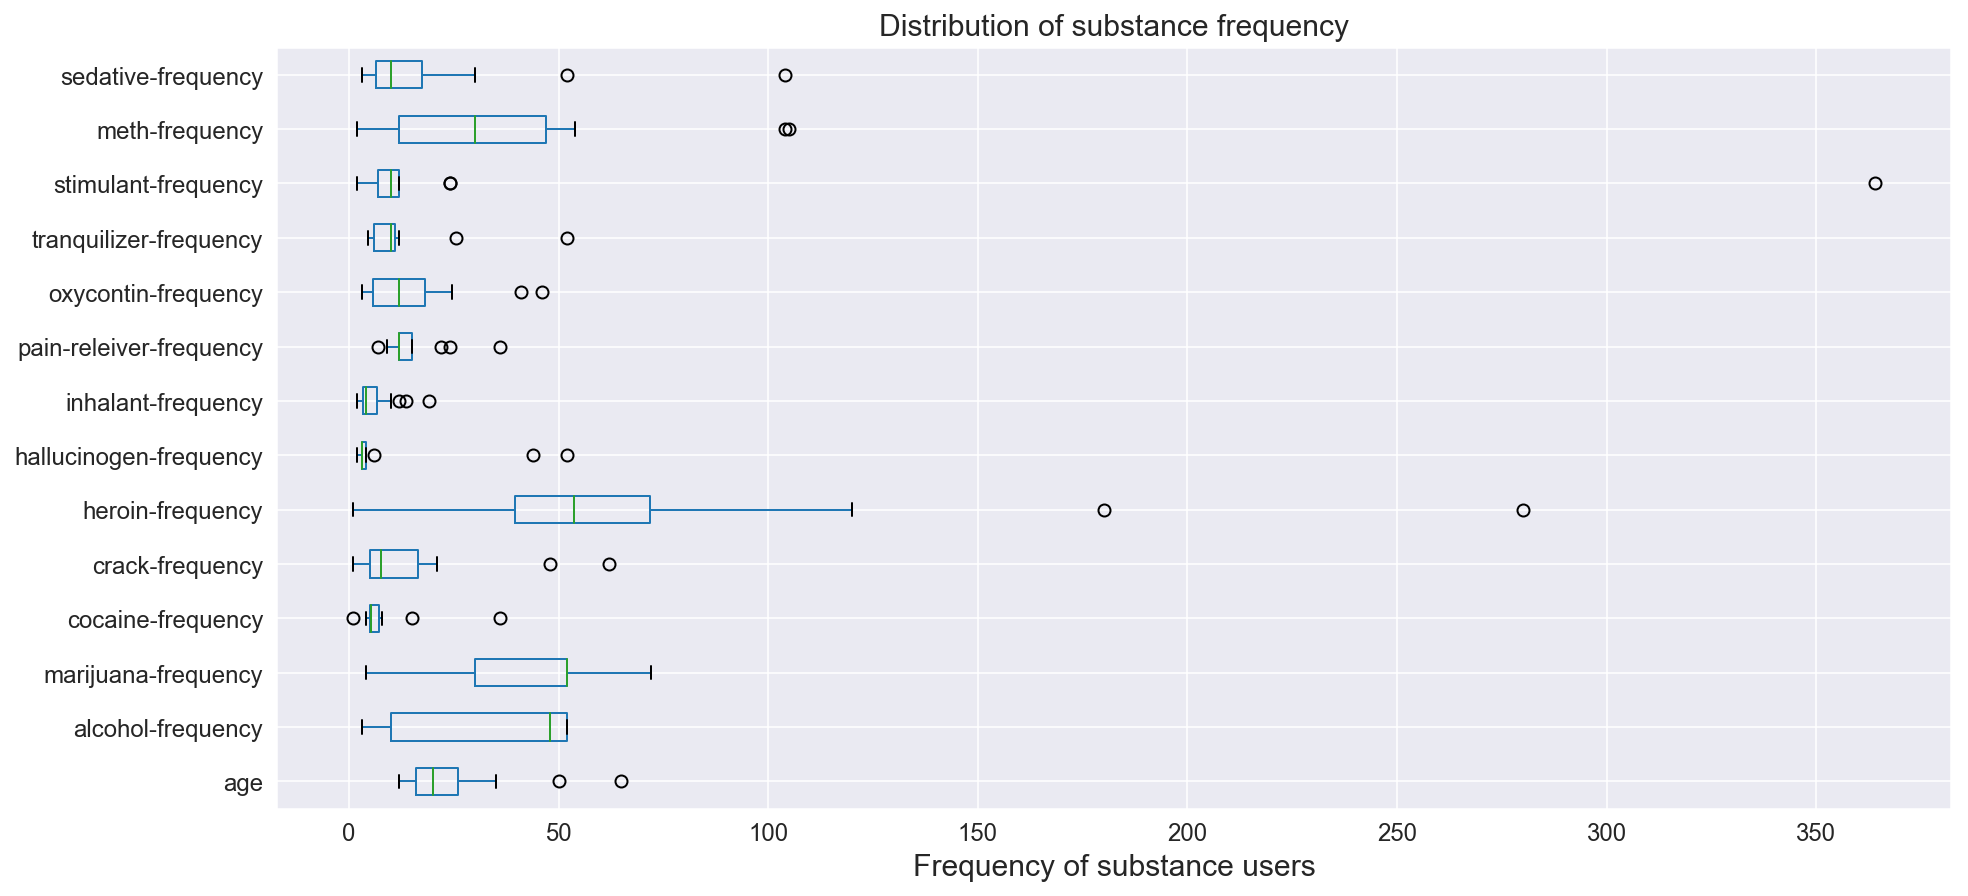

In [19]:
drug_freq.boxplot(vert=False,figsize = (15,7))

plt.title('Distribution of substance frequency', fontsize=15)
plt.xlabel('Frequency of substance users', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

From the boxplot above, we can see that frequency columns contains many outliers.





Furthermore, there were quite a few empty cells to begin with in the first place which we have cleaned and replace with NaN.

Either there are measurement error or that the population has a heavy-tailed distribution.

We will look at drug usage next.

In [20]:
# Repeat the same for drug_usage

usage_list = []
for name in drug_use.columns:
    if 'age' in name:
        usage_list.append(name)    
    elif 'use' in name:
        usage_list.append(name)
        
drug_usage = drug_use[usage_list]

drug_usage.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


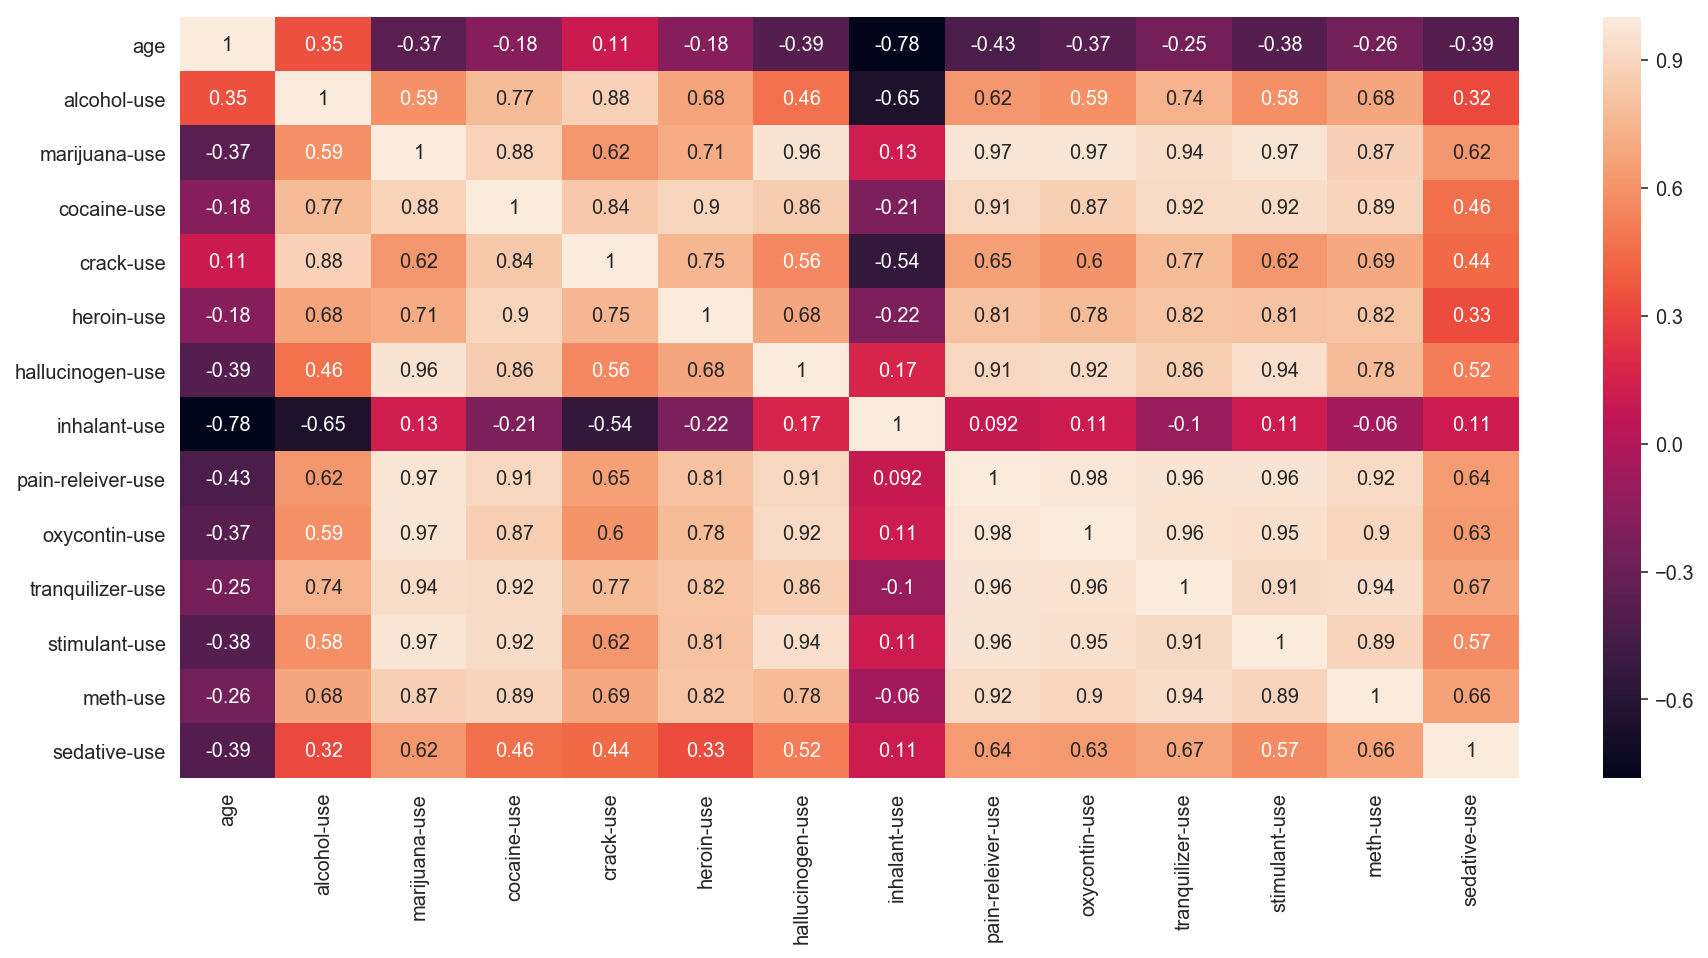

In [21]:
drug_freq.corr()
plt.figure(figsize=(15,7))
sns.heatmap(drug_usage.corr(), annot=True)
plt.show()

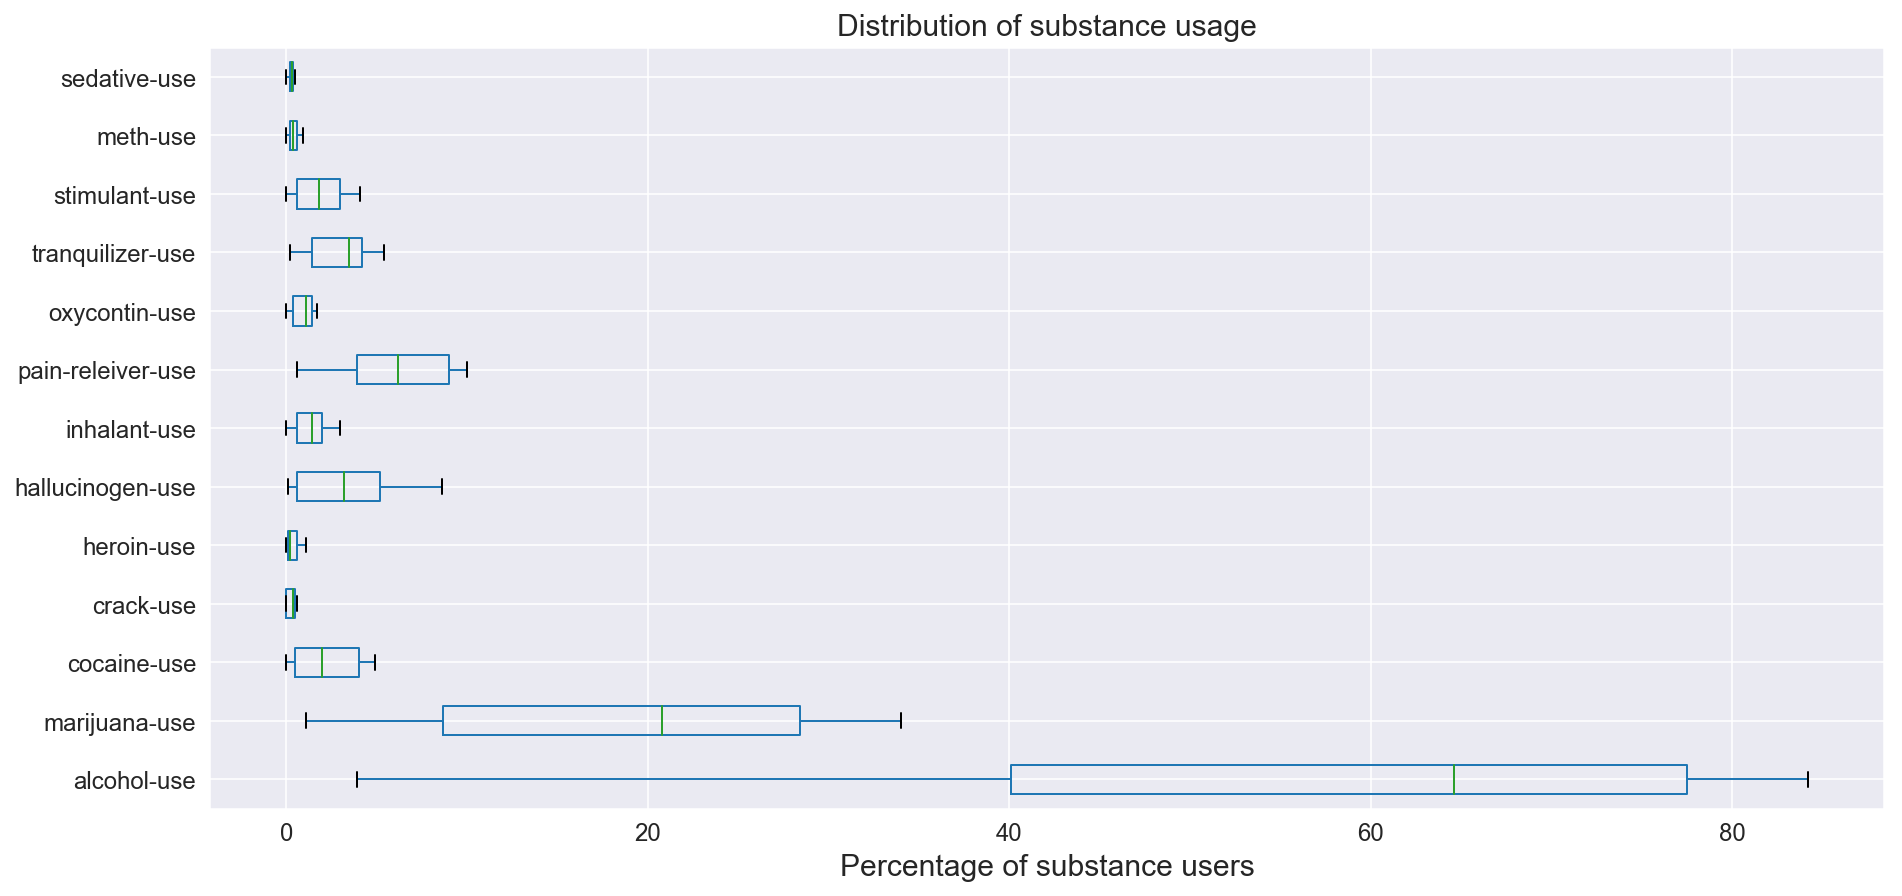

In [22]:
drug_usage.drop('age', axis=1, inplace=False).boxplot(vert=False,figsize=(15,7))

plt.title('Distribution of substance usage', fontsize=15)
plt.xlabel('Percentage of substance users', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

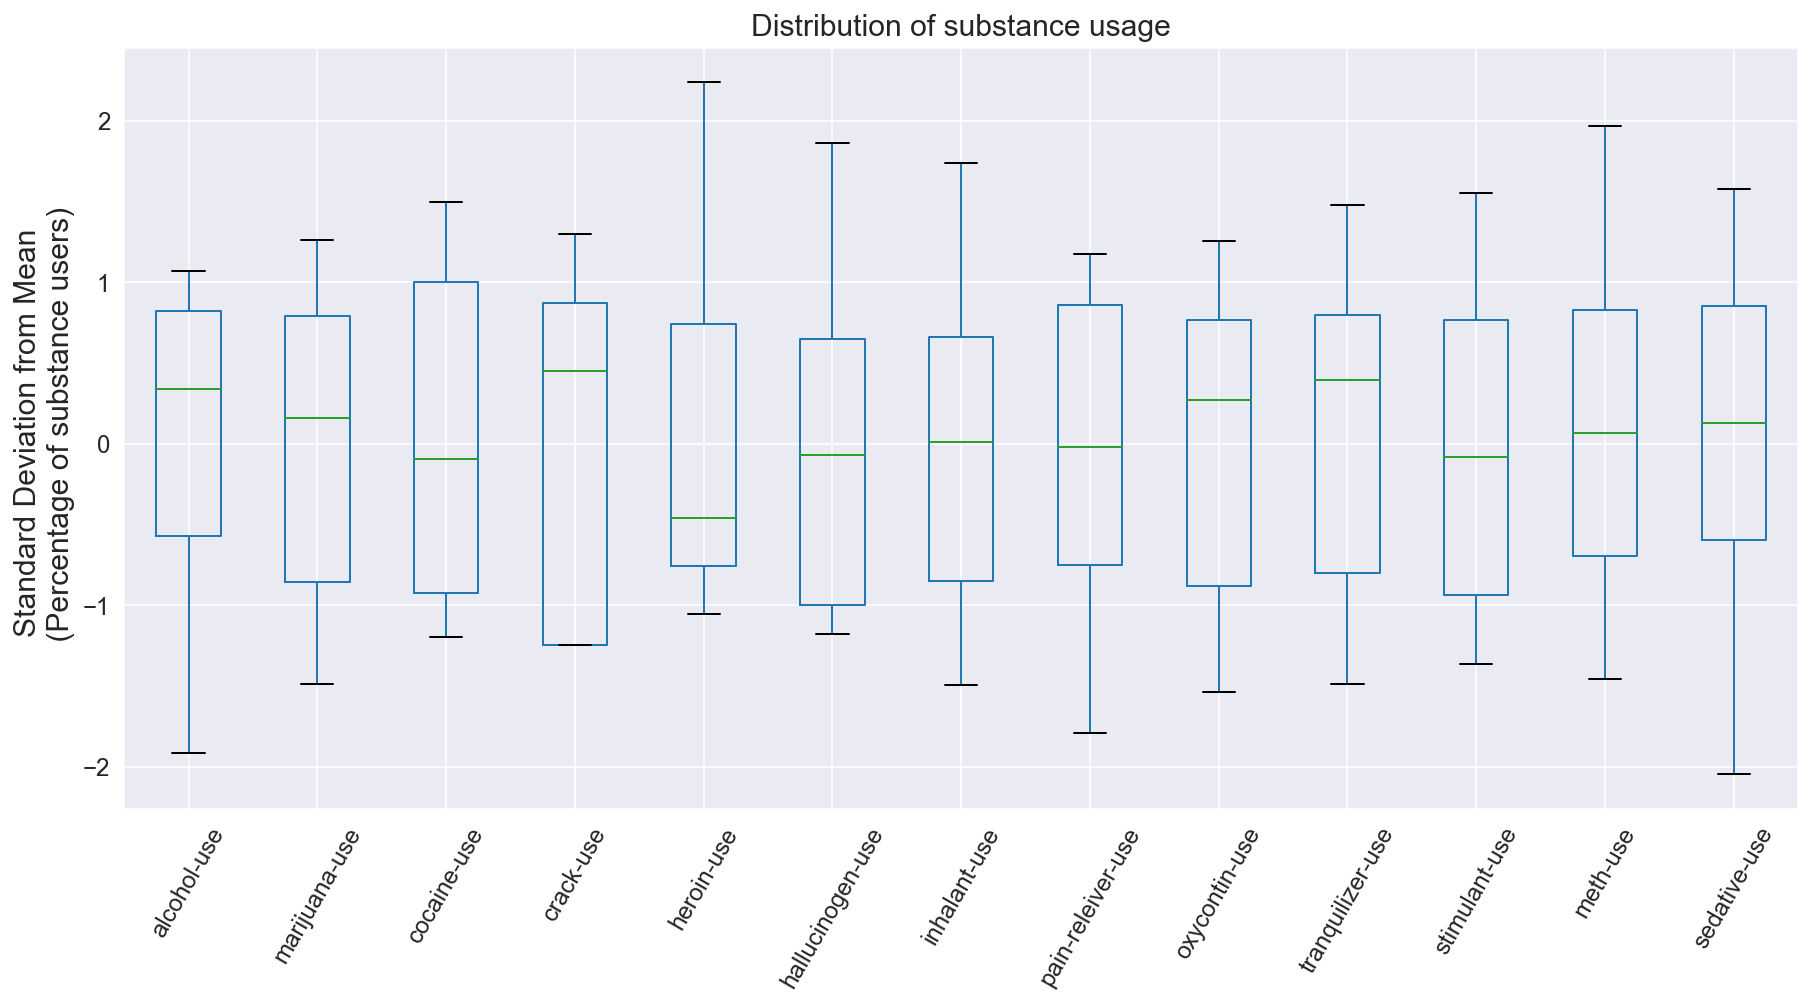

In [23]:
#standardization procedure

drug_use = drug_usage.drop('age', axis=1, inplace=False)

drug_use_stand = (drug_use - drug_use.mean()) / drug_use.std()

drug_use_stand.plot.box(figsize = (15,7))
plt.title('Distribution of substance usage', fontsize=15)
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.ylabel('Standard Deviation from Mean \n (Percentage of substance users)',fontsize=15)
plt.show()

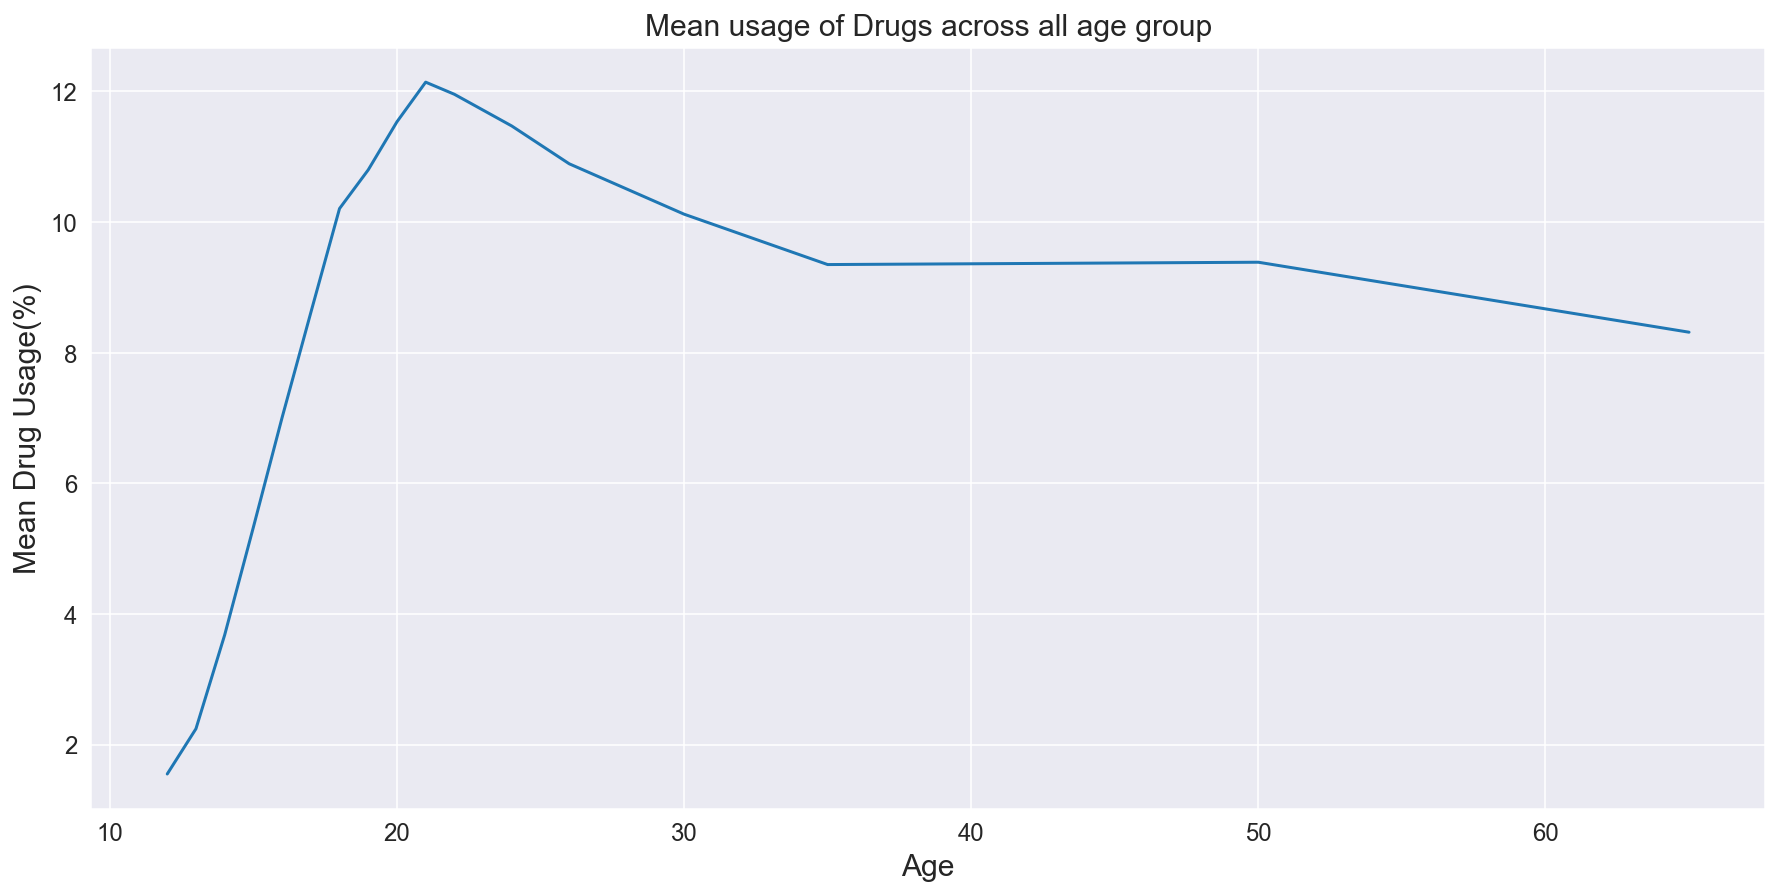

In [24]:
#Calculate and plot the mean usage across age group

age_usage_mean = drug_usage.mean(axis=1).tolist()
age_usage_group = drug_usage['age'].tolist()

plt.figure(figsize=(15,7))
plt.plot(age_usage_group, age_usage_mean)
plt.title('Mean usage of Drugs across all age group', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Mean Drug Usage(%)',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.show()

# My initial overview of the data

First of all, there were too many outliers in most of the frequency columns. As such,  there are either measurement error or that it has a heavy-tailed distribution. 

With limited knowledge about the dataset was collected, i will be focusing on drugs usage rather than drugs frequency for this analysis due to the above reason.

The dataset contains 5 different generations:
- 12-19    : Generation Z
- 20-34    : Generation Y
- 35-49    : Generation X
- 50-65    : Baby Boomers
- 65above  : Silent Generations

In terms of average drugs usage across different age group, we can see from the above line graph that there was sharp increase from age 12 all the way till the peak of age 21, before the gradual decline afterwards. 

why is this so? why the rise only in Generation Z? why the decline afterwards? was it due to medical/health purpose or was it due to teenage drug abuse? 

Lets move on to the analysis of each drugs


Alcohol had the highest use rate. This shouldn't be surprising since alcohol is legally available throughout the country except for those who fall below the legal drinking age. As such, we should and would not do a comparison between alcohol and other drugs.

Marijuana was the highest in terms of drug usage after excluding alcohol. Was this due to the fact that Marijuana(Cannabis) was legalized for recreational use in the two states(Colorado and Washington) in late 2012? 
(Note: This dataset was also taken from a survey conducted in 2012, on drug use from the federal Substance Abuse and Mental Health Data Archive, so there might be some form of impact by the above mentioned legalization.)

Pain relievers is the next highest used drug, followed by hallucinogen. Was this due to medical purposes?

The correlation matrix on drug usage showed mostly positive relationship between drugs. However, Inhalant showed otherwise. The table showed that inhalant has almost close to zero correlation with other drugs except for crack and cocaine (both of which are illegal abusive drugs). The reason might be because Inhalants are found in products that can be easily bought or commonly found in home or workplaces. Was this due to drug abuse?

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

# Cocaine vs Crack Correlation?



Cocaine is a hydrochloride salt in its powdered form, while crack is derived from powdered cocaine by combining it with water and another substance, usually baking soda (sodium bicarbonate). 

Since the two drugs are essentially identical. I would like to conduct a test to see if the demand are actually the same such that the two drugs can be combined into one single column.

**Question**: Is there a statistically significant correlation between the percentage of cocaine and crack users, across different age groups?

**Deliverables**: Whether or not there is a statistically significant correlation between the percentage of cocaine and crack users.

Text(0, 0.5, 'Percentage of crack users')

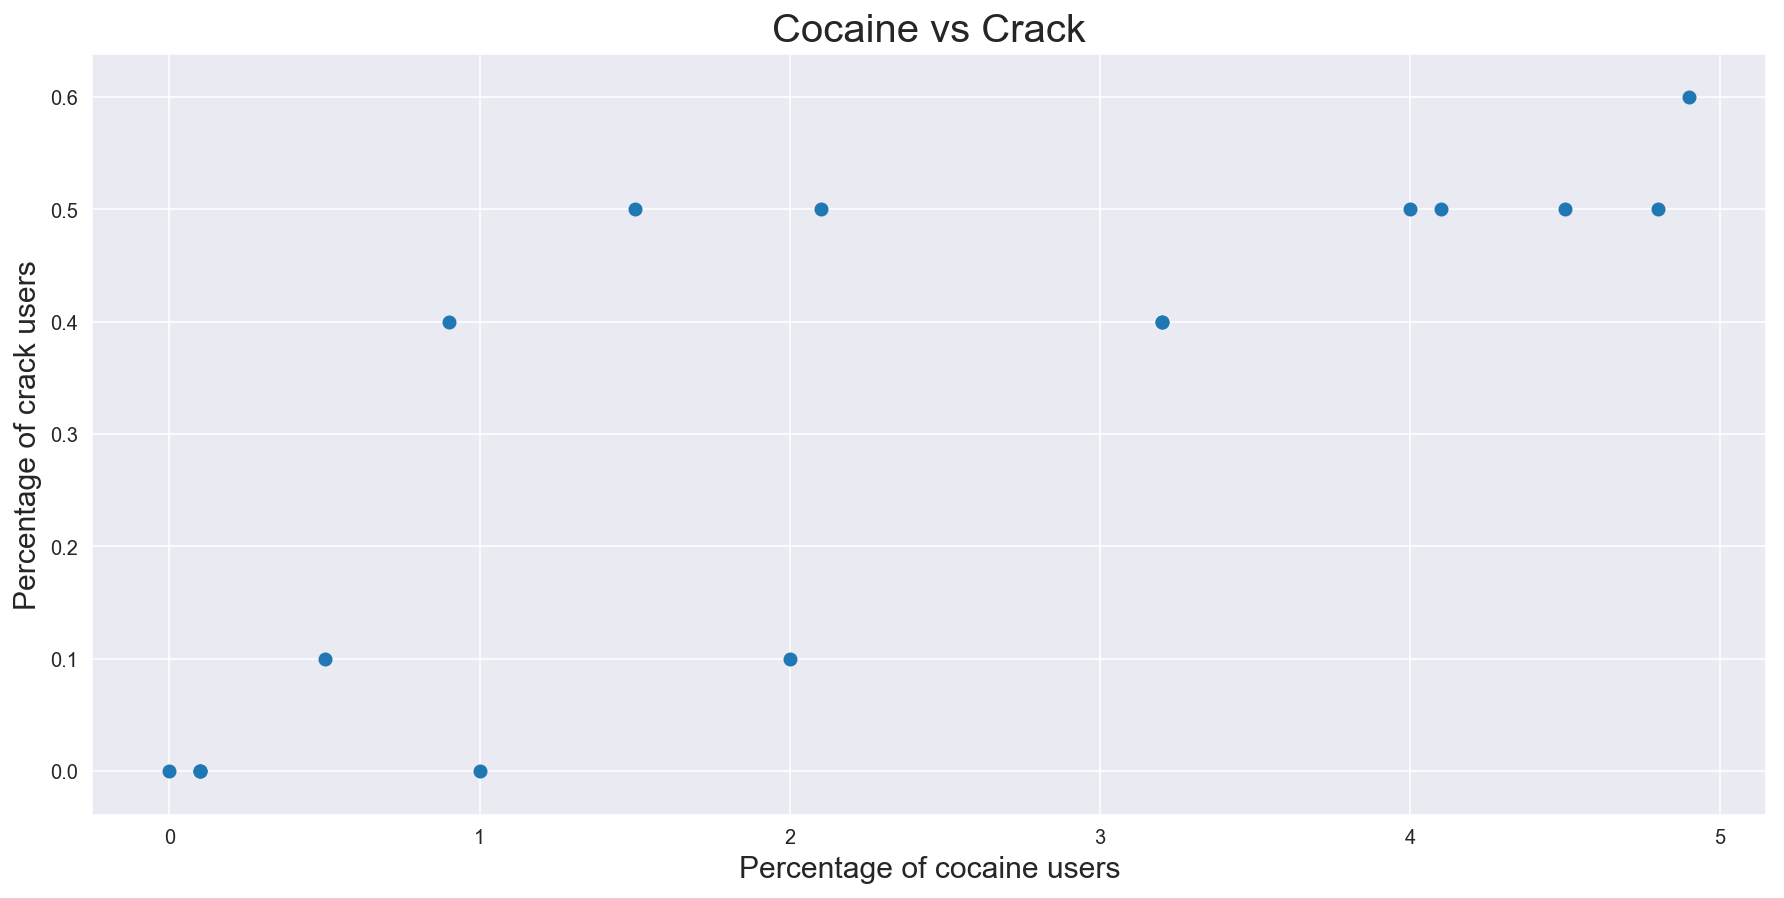

In [25]:
# looking at the relationship between cocaine and crack using scatterplot
plt.figure(figsize=(15,7))
plt.scatter(drug_usage['cocaine-use'],drug_usage['crack-use'])
plt.title('Cocaine vs Crack', fontsize =20)
plt.xlabel('Percentage of cocaine users', fontsize=15)
plt.ylabel('Percentage of crack users', fontsize=15)

Looking at the scatterplot between the percentage of cocaine and crack users, there seems to be a **weak** positive linear relationship between the two variables.

**Null hypothesis** is that there is no statistically significant correlation between the percentage of cocaine and crack users.

In [26]:
#T-test
x1 = drug_usage['cocaine-use'].tolist()
x2 = drug_usage['crack-use'].tolist()
t_stat, p_value = stats.ttest_ind(x1,x2)
print('t-statistic={}, p-value={}'.format(t_stat, p_value))

#test for correlation between cocaine and crack
coke = drug_usage[['cocaine-use','crack-use']]

coke.corr()

t-statistic=4.236413722343398, p-value=0.0001794618946392225


,cocaine-use,crack-use
cocaine-use,1.000000,0.835727
crack-use,0.835727,1.000000


Since p-value is less than 0.05, we can reject the Null hypothesis. Therefore, there is a statistically significant relationship between the percentage of crack and cocaine users and they should be reported seperately. This is supported by the weak positive trend of the scatterplot and the correlation figure of +0.835 above.


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [27]:
sat_score['Rate'].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

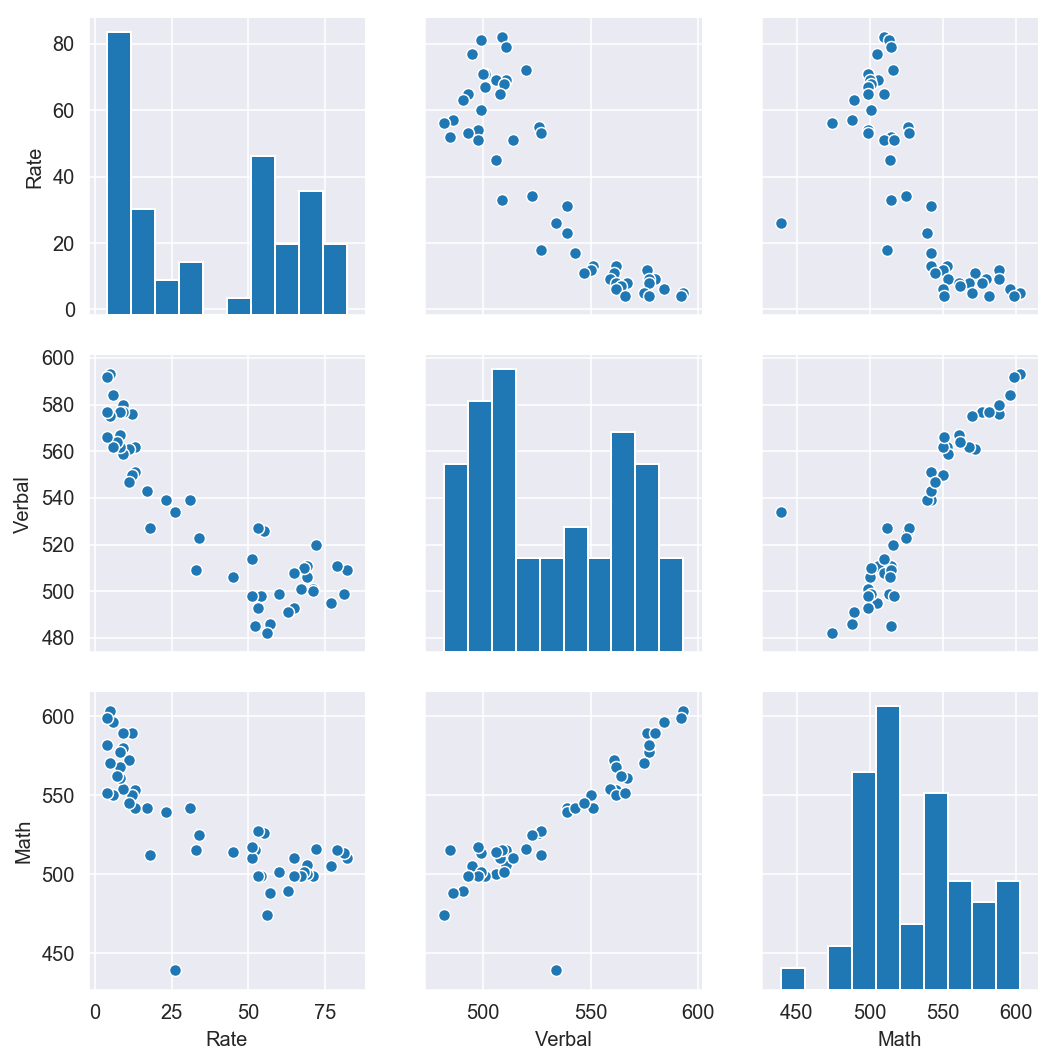

In [28]:
sns.pairplot(sat_score)
plt.show()

There is a distinct outlier as seen both of Math's scatterplot above.


Let's zoom in to look at Verbal vs Math to identify and remove the outlier.

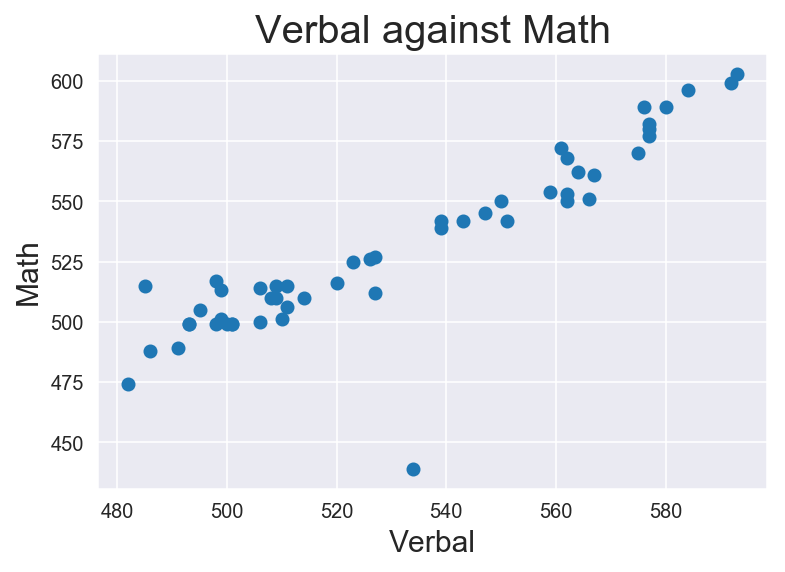

In [29]:
plt.scatter(x=sat_score['Verbal'], y=sat_score['Math'])
plt.title('Verbal against Math', fontsize =20)
plt.xlabel('Verbal', fontsize=15)
plt.ylabel('Math', fontsize=15)
plt.show()

Able to visually spot 1 distinct outlier in the above scatterplot

The outlier is caused by Math's score. So we will conduct a z-test to identify and remove the outlier.


Reference 1: https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561
           

Reference 2: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

In [30]:
#created a function to detect outlier
#threshold is set at 2.5 standard deviation 

outliers=[]

def detect_outlier(data):
    
    threshold=2.5
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier = detect_outlier(sat_score['Math'])

outlier

[439]

In [31]:
#removing outlier
filtered = sat_score[sat_score['Math'] != outlier[0]]

filtered.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


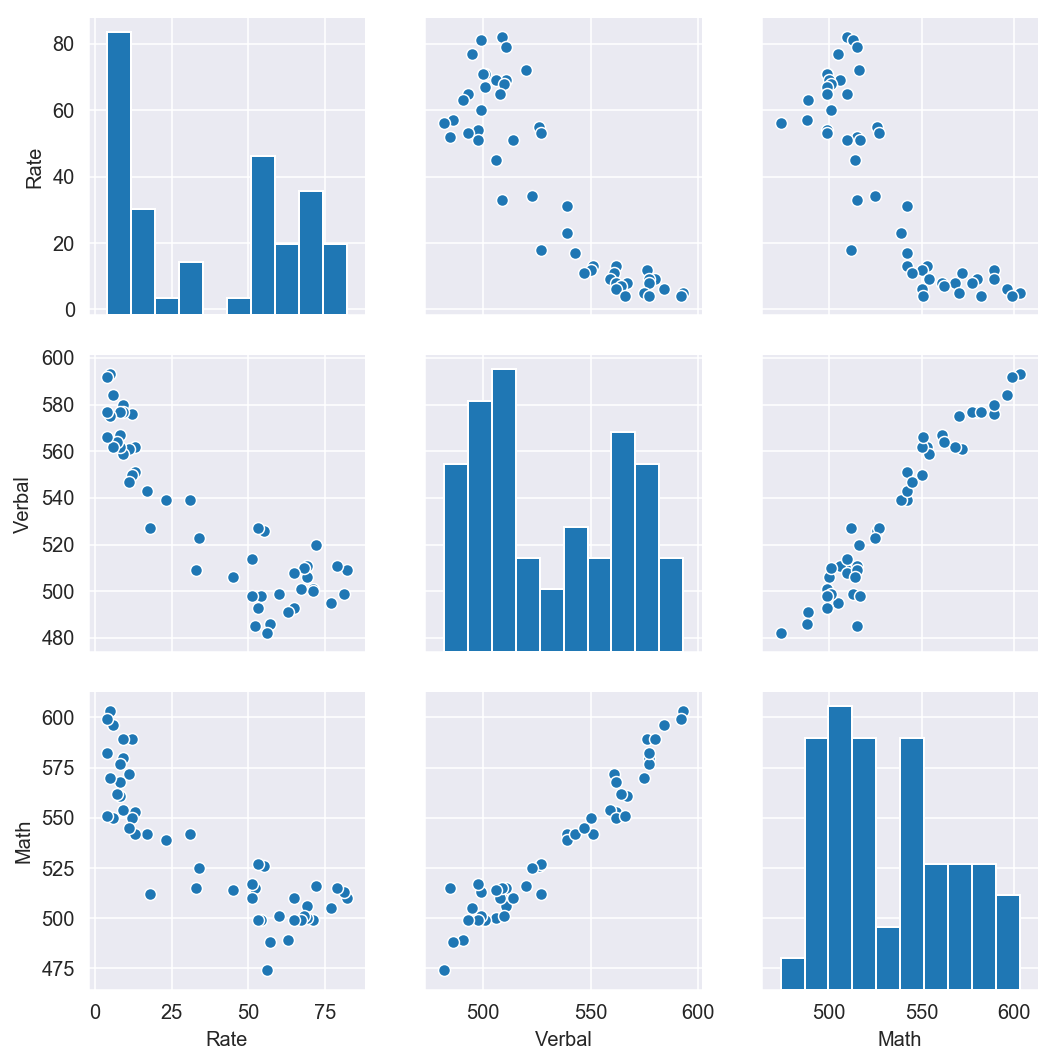

In [32]:
#re-plotting filtered sat_score

sns.pairplot(filtered)
plt.show()

In [33]:
# Original descriptions
print(sat_score['Math'].describe())
print(sat_score['Math'].median())

count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64
521.0


In [34]:
# Filtered descriptions
print(filtered['Math'].describe())
print(filtered['Math'].median())

count     51.000000
mean     533.313725
std       33.890111
min      474.000000
25%      505.500000
50%      525.000000
75%      557.500000
max      603.000000
Name: Math, dtype: float64
525.0


# Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?



Mean for Math's score has increased from 531.5 to 533.3 after the cleaning. This was because score 439 was removed from the dataset, increasing it's mean score

Median has also increased from 521 to 525. This was also due to the removal of score 439. 

Standard deviation has decreased from 36.0 to 33.9 . This was because the removal of score 439 has reduced the deviations from the mean.